In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = make_regression(n_samples=100, n_features=5, random_state=100, noise=5)
X = tf.constant(X, dtype=np.float64)
y = tf.constant(y, dtype=np.float64)

In [3]:
np.shape(X)

TensorShape([100, 5])

In [6]:
ones = tf.ones((X.shape[0], 1), dtype=np.float64)

X_mod = tf.concat([ones, X], axis=1)

In [7]:
X_mod.shape

TensorShape([100, 6])

In [25]:
np.shape(y)

TensorShape([100])

In [27]:
#create model paramters with initial values 
theta = tf.Variable(0., dtype=np.float64)

In [40]:
#training info
train_steps = 500
learning_rate = 0.01

In [41]:
#watch the gradient flow
@tf.function  # Make it fast.
def train_on_batch(X, y):
    with tf.GradientTape() as tape:
        #forward pass 
        yhat = X * W + b

        #calcuate the loss (difference squared error)
        error = yhat - y
        loss = tf.reduce_mean(error**2)

    #evalute the gradient with the respect to the paramters
    dW, db = tape.gradient(loss, [W, b])

    #update the paramters using Gradient Descent  
    W.assign_sub(dW * learning_rate)
    b.assign_sub(db * learning_rate)

    return(loss)

In [42]:
#print the loss every 20 iterations
for i in range(train_steps):
    loss = train_on_batch(X,y)
    
    if i % 20 == 0:
        print("Loss at step {:03d}: {:.3f}".format(i, loss))
        
print(f'W : {W.numpy()} , b  = {b.numpy()} ')

Loss at step 000: 30.513
Loss at step 020: 30.513
Loss at step 040: 30.513
Loss at step 060: 30.513
Loss at step 080: 30.513
Loss at step 100: 30.513
Loss at step 120: 30.513
Loss at step 140: 30.513
Loss at step 160: 30.513
Loss at step 180: 30.513
Loss at step 200: 30.513
Loss at step 220: 30.513
Loss at step 240: 30.513
Loss at step 260: 30.513
Loss at step 280: 30.513
Loss at step 300: 30.513
Loss at step 320: 30.513
Loss at step 340: 30.513
Loss at step 360: 30.513
Loss at step 380: 30.513
Loss at step 400: 30.513
Loss at step 420: 30.513
Loss at step 440: 30.513
Loss at step 460: 30.513
Loss at step 480: 30.513
W : 40.46321292580528 , b  = -0.14493951189167564 


In [43]:
loss = train_on_batch(X, y)

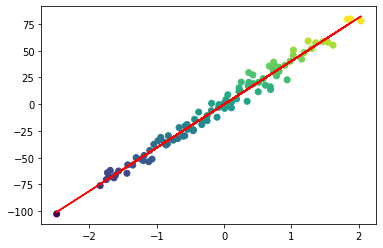

In [44]:
plt.scatter(X, y , c=y)
plt.plot(X, b+W*X, color='red')